![image.png](https://i.imgur.com/a3uAqnb.png)

#**Lab: Pytorch Basics**


---



## **What is Pytorch?** <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/PyTorch_logo_icon.svg/500px-PyTorch_logo_icon.svg.png" width="4%">


**PyTorch** is an open-source deep learning framework that allows us to build and train neural networks using **tensors** and **automatic differentiation**.  
It provides simple, flexible tools to define models, compute gradients using backpropagation, and optimize parameters efficiently.

---


## 📦 **Tensors in PyTorch**

A **tensor** is the main data structure in PyTorch.  
It is similar to a NumPy array, but can run on both CPUs and GPUs.

Tensors are used to represent: input data, model parameters, and model outputs

### 🔹 Creating Tensors

In [1]:
import torch

# Create tensors
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.randn(3)
print("x:", x)
print("y:", y)

x: tensor([1., 2., 3.])
y: tensor([-0.1696, -0.7806,  0.5588])


### 🔹 Tensor Shapes



In [2]:
print("Shape of x:", x.shape)

Shape of x: torch.Size([3])


### 🔹 Tensor Operations

In [3]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

# Element-wise operations
print("Addition:", a + b)
print("Multiplication:", a * b)

# Matrix multiplication
A = torch.randn(2, 3)
B = torch.randn(3, 2)
C = A @ B

print("Matrix multiplication result shape:", C.shape)

Addition: tensor([5., 7., 9.])
Multiplication: tensor([ 4., 10., 18.])
Matrix multiplication result shape: torch.Size([2, 2])




> See! just like Numpy Arrays, but more powerful!



---
## 📊 **Data Representation in Deep Learning**

The way data is represented depends on whether it is **structured (tabular)** or **unstructured (images)**.

### 🔹1️⃣ **Tabular Data (Structured Data)**
Tabular data consists of rows and columns.

Each row represents a sample and each column represents a feature.

- Represented as a **2D tensor**
- Shape: `(batch_size, number_of_features)`
- Commonly used for tasks like regression and classification

Example:
- Features: age, salary, debt  
- Tensor shape: `(N, 3)`

### 🔹2️⃣ **Image Data (Unstructured Data)**
Image data is unstructured and contains spatial information.

- Represented as a **4D tensor**
- Shape: `(batch_size, channels, height, width)`
- Channels represent color information:
  - Grayscale → 1 channel
  - RGB → 3 channels

Example:
- RGB image of size 224×224  
- Tensor shape: `(N, 3, 224, 224)`



---

## 📌 **How to Change Dimensions in PyTorch?**

Manipulating tensor shapes is essential in deep learning. PyTorch provides several functions to modify tensor dimensions.

### **🔹 1️⃣ Flatten**
- Converts **any shape** to `(batch_size, features)`.
- **Example:**  
  `(batch_size, channels, height, width) → (batch_size, features)`

### **🔹 2️⃣ Squeeze**
- **Removes dimensions** with size `1`.
- **Example:**  
  `(1, 32, 3, 28, 28) → (32, 3, 28, 28)`

### **🔹 3️⃣ Unsqueeze**
- **Adds a dimension** with size `1` at a specified position.
- **Example:**  
  `(3, 28, 28) → (1, 3, 28, 28)`

### **🔹 4️⃣ View (works similar to reshape)**
- **Reshapes a tensor freely** while maintaining the same number of elements.
- **Example:**  
  `(32, 3, 28, 28) → view(-1, 3*28*28) → (32, 3*28*28)`



In [4]:
import torch

# 1️⃣ Flatten - Convert any shape to (batch_size, features)
# convert from 4d to 2d
x = torch.randn(32, 3, 28, 28) #(num of sample, rdg,h,w)
x_flat = x.flatten(start_dim=1)# with out thing in () well multi all dim to gather
print("Flatten:", x_flat.shape)  # (32, 2352) row and column

# 2️⃣ Squeeze - Remove dimensions with size 1
x = torch.randn(1, 3, 28, 28)
x_sq = x.squeeze()
print("Squeeze:", x_sq.shape)  # (3, 28, 28)

# 3️⃣ Unsqueeze - Add a new dimension of size 1
x = torch.randn(3, 28, 28)
x_unsq = x.unsqueeze(0) #add to first posision
print("Unsqueeze:", x_unsq.shape)  # (1, 3, 28, 28)

# 4️⃣ View - Reshape freely while keeping same number of elements
x = torch.randn(32, 28, 28, 3)
x_view = x.view(32, -1)  # Flatten all except batch
print("View:", x_view.shape)  # (32, 28*28*3)

Flatten: torch.Size([32, 2352])
Squeeze: torch.Size([3, 28, 28])
Unsqueeze: torch.Size([1, 3, 28, 28])
View: torch.Size([32, 2352])


---

## 📌 **Changing Data Type or Moving Data/Model to CPU/GPU**  

PyTorch allows you to **change the datatype** of a tensor and **move it between CPU and GPU** using `.to()`.  


### 🔹 **Change Datatype**
Use `.to(dtype)` to convert a tensor's data type.

In [5]:
import torch

# Create a float32 tensor
x = torch.tensor([1.2, 2.3, 3.4], dtype=torch.float32)
print(x.dtype)  # Output: torch.float32

# Convert to float16
x_half = x.to(torch.float16)
print(x_half.dtype)  # Output: torch.float16

torch.float32
torch.float16


### 🔹 **Move Tensors to GPU (if available)**
**GPUs are faster and more efficient** in most cases when training or inferencing deep learning models.

Use `.to(device)` to move a tensor to GPU for faster computation.




In [6]:
# Automatically select CPU or GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a tensor and move it to GPU
x_gpu = x.to(device)
print(x_gpu.device)  # Output: cuda:0 (if GPU is available) or cpu

cuda:0


Note: When training a model, always move BOTH the model and data to the same device. Otherwise, you will get an error like this:

`RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!`

---

## **📌 PyTorch Workflow Organization**

### **It consists of 4 main components:**
1️⃣ **Dataset Class**  
- Handles loading and preprocessing data.  
- Converts raw data (e.g., images, CSVs) into model-ready tensors.  

2️⃣ **Model Class**  
- Defines the architecture of your neural network (e.g., layers, activations).  

3️⃣ **Training Loop**  
- Updates model weights using backpropagation and optimizers.  
- Computes the loss for every batch and adjusts the parameters to minimize it.  

4️⃣ **Validation Loop**  
- Evaluates the model's performance on a validation set.  
- Does not update weights but computes metrics like accuracy or loss.  



### **📌 Note:**
All the labs will follow this structure. You will just modify the content for different tasks, such as changing datasets, architectures, or loss functions.

---

## 1️⃣ **Dataset Class**

In PyTorch, a **Dataset Class** is responsible for transforming raw data into samples that are ready to be used by a model.  
Each sample returned consists of:
- An **input** (features or image)
- Its corresponding **label**  



## 🔹 For Tabular Data (Using `TensorDataset`)

When working with **tabular data** (e.g., CSV files already converted to tensors), we can use
`TensorDataset` to pair input features with their labels.

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch

# load data
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# transform to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

# TensorDataset pairs input features (X) with their corresponding labels (y)
# Each item in the dataset is returned as (X[i], y[i])
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Access a single sample from the dataset
# This helps verify the shape of one data sample
first_sample, _ = train_dataset[0]
print(f"Shape of one sample: {first_sample.shape}")

Shape of one sample: torch.Size([30])


## 🔹 For Image Data (Using Built-in Datasets)

In PyTorch, image datasets can be:
- **Built-in datasets** provided by PyTorch (e.g., MNIST, CIFAR-10)
- **Custom datasets** created for data that is not provided in a ready-made format

In **Stage 2**, we'll use **built-in datasets**

In **Stage 3**, we'll create **custom Dataset classes** for our own image data.

In [8]:
from torchvision.datasets import MNIST
from torchvision.transforms.functional import to_tensor

# Training dataset
train_dataset = MNIST(
    root='./datasets',     # Dataset storage path
    train=True,            # Use training data
    transform=to_tensor,   # Convert images to tensors
    download=True          # Download if not available
)

# Testing dataset
test_dataset = MNIST(
    root='./datasets',     # Dataset storage path
    train=False,           # Use test data
    transform=to_tensor,   # Convert images to tensors
    download=True          # Download if not available
)

# print one sample from the dataset
# Each sample consists of an image tensor and its label
sample_image, sample_label = train_dataset[0]

print(f"\n Image shape: {sample_image.shape}")  # (1, 28, 28)
print(f"Label: {sample_label}")


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.42MB/s]


 Image shape: torch.Size([1, 28, 28])
Label: 5



Right now, our **Dataset Class** loads **one sample at a time** when we call:
```python
sample_image, sample_label = train_dataset[0]  # Loads only one sample
```
✅ **That’s great for understanding**, but when training a model, we need to process **multiple samples at once** for efficiency.

❌ **Problem**: We need batches, not single samples.  
✅ **Solution**: We use `DataLoader` to handle batching automatically.

## 📌 **What are DataLoaders ?**

<img src="https://i.imgur.com/aHE3lnE.png" width="70%">


A **DataLoader** is a PyTorch utility that takes a Dataset and does:
- **Batching**: Groups multiple samples together for faster processing.
- **Shuffling**: Randomizes data order to improve training.
- **Multi-threading**: Loads data efficiently in parallel.

| **Argument**     | **Description** |
|-----------------|---------------|
| `dataset` | The dataset object (e.g., `train_dataset`) |
| `batch_size` | Number of samples per batch (e.g., `32`) |
| `shuffle` | Whether to **randomly shuffle** data each epoch (`True` = better for training) |
| `num_workers` | Number of parallel **CPU workers** to load data faster |
| `collate_fn` | A function to **customize how data is stacked** (useful when data has variable sizes) |\

In [9]:
from torch.utils.data import DataLoader

# DataLoader for training data
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)
# DataLoader for test/validation data
test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)
# Get the first batch from the training DataLoader
X_batch, y_batch = next(iter(train_loader))
print(f"Training batch input shape: {X_batch.shape}")
print(f"Training batch labels shape: {y_batch.shape}")


Training batch input shape: torch.Size([32, 1, 28, 28])
Training batch labels shape: torch.Size([32])


---

## 2️⃣ **Model Class**

In PyTorch, `nn.Linear(in_features, out_features)`

creates a **fully connected (dense) layer** that applies a linear transformation:

$y = xW^T + b$


- **`in_features`**: number of input features  
- **`out_features`**: number of neurons (outputs) in the layer  
- The layer automatically creates learnable **weights** and **bias**.

✅ Example: a layer that takes 3 input features and outputs 1 value:



  

In [10]:
import torch
import torch.nn as nn

# Create a linear layer: 3 input features -> 1 output
linear = nn.Linear(in_features=3, out_features=1)

# Example input: batch of 4 samples, each with 3 features
x = torch.randn(4, 3)

# Forward through the layer
y = linear(x)

print("Input shape:", x.shape)   # torch.Size([4, 3])
print("Output shape:", y.shape)  # torch.Size([4, 1])

Input shape: torch.Size([4, 3])
Output shape: torch.Size([4, 1])


### **📌 Key Components of Model Class:**
####1️⃣ **Define Layers (`__init__` method):**  

Inside the `__init__` method, we define **what the neural network looks like**. This includes:

- **Number of layers**  
  How many linear (`nn.Linear`) layers the model has (depth of the network).

- **Hidden layer sizes**  
  How many neurons each hidden layer contains.

- **Activation functions**  
  Activation functions introduce **non-linearity**, allowing the network to learn complex patterns.
  - Common choice for hidden layers: **ReLU**

- **Output activation function**  
  The activation used at the final layer depends on the task:
  - **Binary classification** → `Sigmoid`
  - **Multiclass classification** → `Softmax`
  - **Regression** → No activation (linear output)

📌 **Important:**  
Hidden layers usually use ReLU, while the **output layer activation is task-dependent**.

#### 2️⃣ **Forward Pass (`forward` method):**

The `forward()` method defines **how the input data flows through the model** to produce the final output.

- The input tensor is passed through each layer **in order**.
- Activation functions are applied after linear layers to introduce **non-linearity**.
- The final layer produces the model’s prediction.

📌 **Note:**  
During training, PyTorch automatically tracks all operations in the `forward()` method to compute gradients during backpropagation.





✅ **Example: One neural network layer**


<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*IAkZWzDOYGaiu3e47rEMgQ.png" width="60%">



In [11]:
class NN1Layer(nn.Module):

  def __init__(self, input_dim):

    super(NN1Layer, self).__init__()
    # input_dim = num of features, Output for binary classification is 1
    self.layer_1 = nn.Linear(input_dim, 1)

    # output activation function
    self.sigmoid = nn.Sigmoid()

  # forward pass
  def forward(self, x):
    z = self.layer_1(x)
    a = self.sigmoid(z)
    return a

✅ **Example: Two neural network layers**


<img src="https://miro.medium.com/v2/0*GZrkL6Lqt9dIAJ61.jpg" width="60%">

In [12]:
class NN2Layer(nn.Module):

    def __init__(self, input_dim, hidden_dim):

        super(NN2Layer, self).__init__()
        # input_dim = num of features, hidden_dim = num of neurons
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        # hidden_dim = num of neurons, Output for binary classification is 1
        self.layer2 = nn.Linear(hidden_dim, 1)

        # non-linearity activation function
        self.relu = nn.ReLU()
        # output activation function
        self.sigmoid = nn.Sigmoid()

    # forward pass
    def forward(self, x):
        z1 = self.layer1(x)
        a1 = self.relu(z1)
        z2 = self.layer2(a1)
        a2 = self.sigmoid(z2)
        return a2



> We can instantiate the model and print it to see the architecture, layers, and total number of trainable parameters.



In [13]:
# Instantiate the model
input_dim = 4     # number of input features
hidden_dim = 3    # number of hidden neurons

model = NN2Layer(input_dim, hidden_dim)

# Print the model architecture
print("Model Architecture:\n")
print(model)

# Calculate the total number of trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTotal trainable parameters: {total_params}")

Model Architecture:

NN2Layer(
  (layer1): Linear(in_features=4, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Total trainable parameters: 19


---

## 3️⃣ **Training Loop**

The **training loop** is responsible for **updating the model's weights** so that it learns to minimize the loss function.

### 🧩 **Parameters**

- **`model`** – The neural network to be trained.  
- **`optimizer`** – Updates model parameters (e.g., SGD, Adam).  
- **`criterion`** – Loss function, depends on the task.  
- **`train_loader`** – PyTorch `DataLoader` that provides batches of training data.  
- **`device`** – Device used for computation (`cpu` or `cuda`).




In [14]:
def train_one_epoch(model, optimizer, criterion, train_loader, device):
    # Set the model to training mode
    model.train()

    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Move batch to the selected device
        X_batch = X_batch.to(device)
        y_batch = y_batch.view(-1, 1).to(device)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass & optimization
        optimizer.zero_grad()   # Clear previous gradients
        loss.backward()         # Compute gradients
        optimizer.step()        # Update model parameters

        running_loss += loss.item()

    # Average loss over all batches
    avg_loss = running_loss / len(train_loader)

    return avg_loss

###📌 **For criterions (Loss Functions)**:
Different tasks require different loss functions
- Linear Regression → `nn.MSELoss()`  
- Binary classification → `nn.BCELoss()`  
- Multiclass classification → `nn.CrossEntropyLoss()`

####1️⃣ `nn.MSELoss()`
- `MSELoss` expects **continuous values** (regression).





In [15]:
# Example predictions and targets
y_pred = torch.tensor([[2.5], [3.0], [4.5]])
y_true = torch.tensor([[3.0], [2.5], [5.0]])

criterion = nn.MSELoss()
loss = criterion(y_pred, y_true)
print("MSE Loss:", loss.item())

MSE Loss: 0.25


####2️⃣ `nn.BCELoss()`
- `BCELoss` expects **probabilities** between 0 and 1.



In [16]:
# Predicted probabilities (after sigmoid)
y_pred = torch.tensor([[0.8], [0.3], [0.6]])
y_true = torch.tensor([[1.0], [0.0], [1.0]])

criterion = nn.BCELoss()
loss = criterion(y_pred, y_true)
print("Binary Cross Entropy Loss:", loss.item())

Binary Cross Entropy Loss: 0.36354804039001465


####3️⃣ `nn.CrossEntropyLoss()`
- `CrossEntropyLoss` expects **raw logits** (no Softmax needed).


In [17]:
# Raw model outputs (logits), shape: (batch_size, num_classes)
logits = torch.tensor([
    [2.0, 0.5, 1.0],
    [0.1, 1.5, 0.3]
])
# True class indices
targets = torch.tensor([0, 1])

criterion = nn.CrossEntropyLoss()
loss = criterion(logits, targets)
print("Cross Entropy Loss:", loss.item())

Cross Entropy Loss: 0.450598806142807


---


## 4️⃣ **Validation Loop**

The **validation loop** evaluates the model’s performance on unseen data **without updating the weights**.

It is used to measure how well the model generalizes.

### 🧩 Parameters

- **`model`** – The trained neural network to be evaluated.  
- **`criterion`** – Loss function used for evaluation
- **`test_loader`** – PyTorch `DataLoader` that provides batches of validation/test data.  
- **`device`** – Device used for computation (`cpu` or `cuda`).  


📌 **Note:**  
Gradients are disabled during validation using `torch.no_grad()` to improve efficiency and prevent weight updates.


In [18]:
def validate(model, criterion, test_loader, device):
    # Set the model to evaluation mode
    model.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation
        for X_batch, y_batch in test_loader:
            # Move batch to the selected device
            X_batch = X_batch.to(device)
            y_batch = y_batch.view(-1, 1).to(device)

            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()

            # Binary predictions
            predicted = (outputs > 0.5).float()

            # Accuracy calculation
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    avg_loss = running_loss / len(test_loader)
    accuracy = correct / total

    return avg_loss, accuracy


---

## **📌 Full Training Process in PyTorch**

Now that you understand the **Dataset Class, Model Class, Training Loop, and Validation Loop**, it's time to put everything together into a **full training process**.


### Import Libraries

In [19]:
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

### Prepare Data

In [20]:
data = load_breast_cancer()

X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# transform to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets for training and testing
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create Dataloaders to train and test data in batches
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Run full training

In [21]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

num_epochs = 50
learning_rate = 0.001

# Model, Criterion, Optimizer
input_dim = X_train.shape[1]
hidden_dim = 10
model =NN2Layer(input_dim, hidden_dim).to(device)
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=learning_rate)


# Run Training
train_losses = []
val_losses = []
val_accuracies = []

print('Starting Training...')
for epoch in range(num_epochs):
    # Train one epoch
    train_loss = train_one_epoch(model, optimizer, criterion, train_loader, device)

    # Validate
    val_loss, val_accuracy = validate(model, criterion, test_loader, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

print('Training Complete!')

Using device: cuda
Starting Training...
Epoch [5/50], Train Loss: 0.4855, Val Loss: 0.4531, Val Accuracy: 0.8860
Epoch [10/50], Train Loss: 0.2758, Val Loss: 0.2747, Val Accuracy: 0.9211
Epoch [15/50], Train Loss: 0.1630, Val Loss: 0.1877, Val Accuracy: 0.9561
Epoch [20/50], Train Loss: 0.1170, Val Loss: 0.1462, Val Accuracy: 0.9561
Epoch [25/50], Train Loss: 0.0948, Val Loss: 0.1235, Val Accuracy: 0.9561
Epoch [30/50], Train Loss: 0.1043, Val Loss: 0.1103, Val Accuracy: 0.9649
Epoch [35/50], Train Loss: 0.0731, Val Loss: 0.1036, Val Accuracy: 0.9561
Epoch [40/50], Train Loss: 0.0647, Val Loss: 0.0977, Val Accuracy: 0.9649
Epoch [45/50], Train Loss: 0.0584, Val Loss: 0.0934, Val Accuracy: 0.9561
Epoch [50/50], Train Loss: 0.0553, Val Loss: 0.0897, Val Accuracy: 0.9649
Training Complete!


### Plot losses

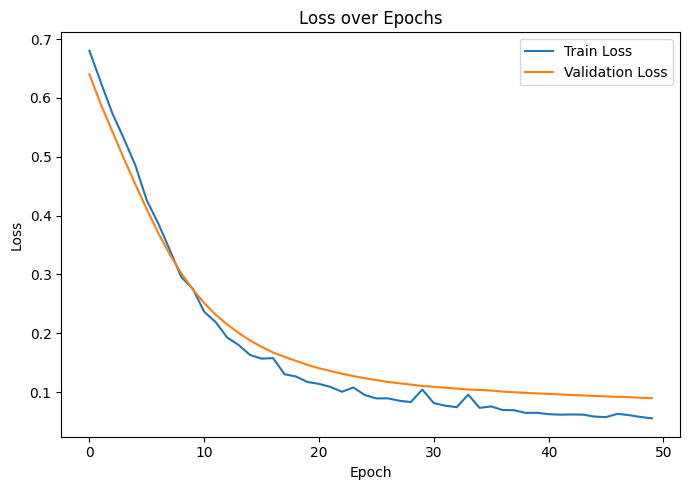

In [22]:
# Plotting results
plt.figure(figsize=(7, 5))

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Now you know how to use PyTorch for NNs :)


![image.png](https://i.imgur.com/1xbDOQX.jpeg)

### **Contributed by: Yara Alzahrani, Mohamed Eltayeb**